In [67]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_data import FrankeFunction
from prepare_data import create_design_matrix
from model_selection import R2, MSE, cross_validation

# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [128]:
# Choose hyperparameters for model
pol_degree = 5
data_size = 20
test_size = 0.2
error_std = 0.5
save_fig = False

In [129]:
# Make data
x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(loc=0, scale=error_std)

In [130]:
# Define empty list in which to store the MSE and R2 errors
mses = []
mses_train = []
r2s = []
r2s_train = []

# Train and test model for different polynomial derees
for i in range(1, pol_degree+1):
    X = create_design_matrix(x, y, i)
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = test_size)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 

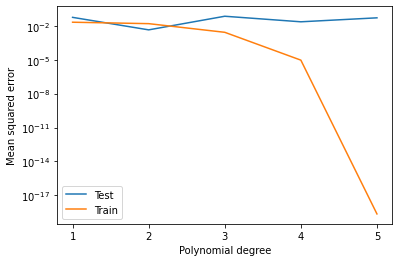

In [131]:
# Plot MSE
plot_mse_per_poldegree(mses_train, mses, pol_degree=pol_degree, save_plot = save_fig, save_title = 'OLS_MSE_n=' + str(data_size) + ', sigma=' + str(error_std))

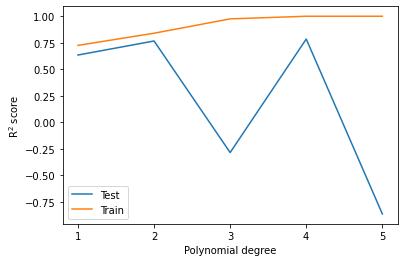

In [132]:
# Plot R2
plot_R2_per_poldegree(r2s_train, r2s, pol_degree=pol_degree, save_plot = save_fig, save_title = 'OLS_R2_n=' + str(data_size) + ', sigma= ' + str(error_std))

#### Test that you get same result using sklearn

In [149]:
with open('../testing_outputs/osl_sklearn_compare.txt', 'w') as f:
    f.write('Coefficients (OLS_homemade), Coefficients (sklearn) \n')
    homemade_coefs = lr.coeffs
    
    lr_sk = LinearRegression()
    lr_sk.fit(X_train, z_train)
    sk_intercept = lr_sk.intercept_
    sk_coeffs = lr_sk.coef_
    
    f.write(str(homemade_coefs[0]) + ', ' + str(sk_intercept) + '\n')
    for i in range(1, len(homemade_coefs)):
         f.write(str(homemade_coefs[i]) + ', ' + str(sk_coeffs[i-1]) + '\n')